In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import string
os.getcwd()
os.chdir('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/bin/jupyter')


In [2]:
df_transit = pd.read_excel('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/2021 Fuel and Energy_static_0.xlsx', sheet_name='Fuel and Energy')
df_transit=df_transit.loc[df_transit['State'] == "CT"]
df_transit=df_transit[['Agency','City','TOS','Primary UZA Population','Mode','TOS','Mode VOMS','Fuel/Energy Used:','Diesel (gal)','Gasoline (gal)','Miles Traveled by Vehicles Fueled by:','Diesel','Gasoline','Miles per Gallon/KwH:',
                                'Diesel (mpg)','Gasoline (mpg)']]

In [3]:
#calculation of the carbon dioxide emission based on the fuel( two main fuels: gasoline, diesel)
gasoline=8.78
diesel=10.21

#calculation of the methane and nitrous oxide emission based on the vmt, comes from the lggit the heavy-truck vehicle
#CH4
gasoline_1=0.0577
diesel_1=0.0051


#N2O
gasoline_2=0.1468
diesel_2=0.0048

#unis is metric tons, from lggit 
CO2_Emissions=df_transit['Gasoline (gal)']*gasoline/1000+df_transit['Diesel (gal)']*diesel/1000
CH4_Emissions=df_transit['Gasoline']*gasoline_1/1000000+df_transit['Diesel']*diesel_1/1000000
N2O_Emissions=df_transit['Gasoline']*gasoline_2/1000000+df_transit['Diesel']*diesel_2/1000000

CO2_equ_CH4=CH4_Emissions*25
CO2_equ_N2O=N2O_Emissions*298

ghg_Emissions=CO2_Emissions+CO2_equ_CH4+CO2_equ_N2O
df_transit['GHG Emissions (kTCO2e)']=ghg_Emissions/1000

#compare then gasoline emission and diesel emissions
df_transit['Gasoline Emissions (kTCO2e)']=(df_transit['Gasoline (gal)']*gasoline/1000+df_transit['Gasoline']*gasoline_1/1000000*21+df_transit['Gasoline']*gasoline_2/1000000*310)/1000# conver to kiloton
df_transit['Diesel Emissions (kTCO2e)']=(df_transit['Diesel (gal)']*diesel/1000+df_transit['Diesel']*diesel_1/1000000*21+df_transit['Diesel']*diesel_2/1000000*310)/1000

In [4]:
df_transit['MSA']=["Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown",'New Haven-Milford','New Haven-Milford','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk',
               'New Haven-Milford','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk',"Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown",'New London','New London', "Hartford-East Hartford-Middletown",'New Haven-Milford','New Haven-Milford','New Haven-Milford']
               

In [5]:
df_transit

,Agency,City,TOS,Primary UZA Population,Mode,TOS,Mode VOMS,Fuel/Energy Used:,Diesel (gal),Gasoline (gal),Miles Traveled by Vehicles Fueled by:,Diesel,Gasoline,Miles per Gallon/KwH:,Diesel (mpg),Gasoline (mpg),GHG Emissions (kTCO2e),Gasoline Emissions (kTCO2e),Diesel Emissions (kTCO2e),MSA
345,Connecticut Department of Transportation - CTT...,Hartford,DO,924859,RB,DO,9,NaN,252354,0,NaN,713734,0,NaN,2.828305,NaN,2.577646,0.000000,2.577673e+00,Hartford-East Hartford-Middletown
346,Connecticut Department of Transportation - CTT...,Hartford,DO,924859,MB,DO,220,NaN,1965012,0,NaN,9982367,0,NaN,5.080054,NaN,20.078324,0.000000,2.007870e+01,Hartford-East Hartford-Middletown
521,Greater Hartford Transit District,Hartford,PT,924859,DR,PT,109,NaN,56709,446706,NaN,671809,3293725,NaN,11.846603,7.373362,4.650964,4.075961,5.800705e-01,Hartford-East Hartford-Middletown
539,Connecticut Department of Transportation - CTT...,Hartford,DO,562839,MB,DO,99,NaN,1029192,0,NaN,4132016,0,NaN,4.014816,NaN,10.514488,0.000000,1.051464e+01,Hartford-East Hartford-Middletown
721,Connecticut Department of Transportation- CTTr...,Watertown,PT,194535,MB,PT,36,NaN,288561,0,NaN,1414086,0,NaN,4.900475,NaN,2.948411,0.000000,2.948463e+00,New Haven-Milford
724,Connecticut Department of Transportation- CTTr...,Watertown,PT,194535,DR,PT,27,NaN,0,73349,NaN,0,513370,NaN,NaN,6.999005,0.667203,0.667989,0.000000e+00,New Haven-Milford
739,Norwalk Transit District,Norwalk,PT,923311,DR,PT,8,NaN,0,7853,NaN,0,67589,NaN,NaN,8.606774,0.072004,0.072107,0.000000e+00,Bridgeport-Stamford-Norwalk
743,Norwalk Transit District,Norwalk,DO,923311,MB,DO,27,NaN,189811,56360,NaN,734021,0,NaN,3.867115,0.000000,2.433955,0.494841,1.939141e+00,Bridgeport-Stamford-Norwalk
744,Norwalk Transit District,Norwalk,DO,923311,DR,DO,25,NaN,14811,41320,NaN,158206,471776,NaN,10.681656,11.417619,0.535575,0.384831,1.514727e-01,Bridgeport-Stamford-Norwalk
752,Greater Bridgeport Transit Authority,Bridgeport,DO,923311,MB,DO,39,NaN,399665,0,NaN,1749937,0,NaN,4.378510,NaN,4.083306,0.000000,4.083371e+00,Bridgeport-Stamford-Norwalk


In [6]:
df_transit

,Agency,City,TOS,Primary UZA Population,Mode,TOS,Mode VOMS,Fuel/Energy Used:,Diesel (gal),Gasoline (gal),Miles Traveled by Vehicles Fueled by:,Diesel,Gasoline,Miles per Gallon/KwH:,Diesel (mpg),Gasoline (mpg),GHG Emissions (kTCO2e),Gasoline Emissions (kTCO2e),Diesel Emissions (kTCO2e),MSA
345,Connecticut Department of Transportation - CTT...,Hartford,DO,924859,RB,DO,9,NaN,252354,0,NaN,713734,0,NaN,2.828305,NaN,2.577646,0.000000,2.577673e+00,Hartford-East Hartford-Middletown
346,Connecticut Department of Transportation - CTT...,Hartford,DO,924859,MB,DO,220,NaN,1965012,0,NaN,9982367,0,NaN,5.080054,NaN,20.078324,0.000000,2.007870e+01,Hartford-East Hartford-Middletown
521,Greater Hartford Transit District,Hartford,PT,924859,DR,PT,109,NaN,56709,446706,NaN,671809,3293725,NaN,11.846603,7.373362,4.650964,4.075961,5.800705e-01,Hartford-East Hartford-Middletown
539,Connecticut Department of Transportation - CTT...,Hartford,DO,562839,MB,DO,99,NaN,1029192,0,NaN,4132016,0,NaN,4.014816,NaN,10.514488,0.000000,1.051464e+01,Hartford-East Hartford-Middletown
721,Connecticut Department of Transportation- CTTr...,Watertown,PT,194535,MB,PT,36,NaN,288561,0,NaN,1414086,0,NaN,4.900475,NaN,2.948411,0.000000,2.948463e+00,New Haven-Milford
724,Connecticut Department of Transportation- CTTr...,Watertown,PT,194535,DR,PT,27,NaN,0,73349,NaN,0,513370,NaN,NaN,6.999005,0.667203,0.667989,0.000000e+00,New Haven-Milford
739,Norwalk Transit District,Norwalk,PT,923311,DR,PT,8,NaN,0,7853,NaN,0,67589,NaN,NaN,8.606774,0.072004,0.072107,0.000000e+00,Bridgeport-Stamford-Norwalk
743,Norwalk Transit District,Norwalk,DO,923311,MB,DO,27,NaN,189811,56360,NaN,734021,0,NaN,3.867115,0.000000,2.433955,0.494841,1.939141e+00,Bridgeport-Stamford-Norwalk
744,Norwalk Transit District,Norwalk,DO,923311,DR,DO,25,NaN,14811,41320,NaN,158206,471776,NaN,10.681656,11.417619,0.535575,0.384831,1.514727e-01,Bridgeport-Stamford-Norwalk
752,Greater Bridgeport Transit Authority,Bridgeport,DO,923311,MB,DO,39,NaN,399665,0,NaN,1749937,0,NaN,4.378510,NaN,4.083306,0.000000,4.083371e+00,Bridgeport-Stamford-Norwalk


In [7]:
#summation of all transit system in the same MSAs
sum_gaso = df_transit.groupby('MSA')['Gasoline Emissions (kTCO2e)'].sum()
sum_diesel = df_transit.groupby('MSA')['Diesel Emissions (kTCO2e)'].sum()
sum_total = df_transit.groupby('MSA')['GHG Emissions (kTCO2e)'].sum()

def add_values(x, y):
    return x + y

s3 = sum_gaso.combine(sum_diesel, add_values)

In [8]:
data = [['Gasoline Emissions',sum_gaso], ['Diesel Emissions', sum_diesel], ['Total Emissions',sum_total]]
df_emission = pd.DataFrame(data, columns=['MSA', 'Emissions'])

#series1 = pd.Series(['Bridgeport-Stamford-Norwalk', 'Hartford-East Hartford-Middletown', 'New Haven-Milford'], name='MSA')
#series2 = pd.Series(['

In [9]:
df = pd.DataFrame({'Gasoline Emissions': sum_gaso[0:3], 'Diesel Emissions':sum_diesel[0:3], 'Total Emissions':sum_total[0:3]})

In [10]:
df

,Gasoline Emissions,Diesel Emissions,Total Emissions
MSA,,,
Bridgeport-Stamford-Norwalk,1.865279,7.983678,9.847155
Hartford-East Hartford-Middletown,4.075961,56.195171,60.265358
New Haven-Milford,3.327866,3.563353,6.887138


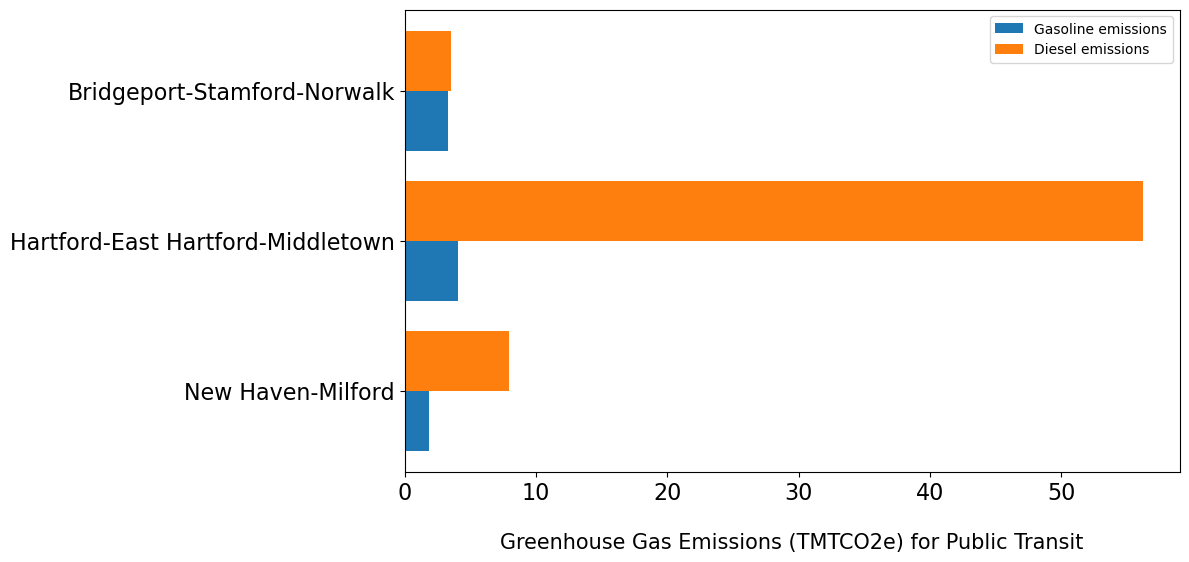

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
X = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
Gasoline = df['Gasoline Emissions']
Diesel = df['Diesel Emissions']

Y_axis = np.arange(len(X))

plt.barh(Y_axis -0.2, Gasoline, 0.4, label='Gasoline emissions')
plt.barh(Y_axis +0.2, Diesel, 0.4, label='Diesel emissions')

plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Greenhouse Gas Emissions (TMTCO2e) for Public Transit",fontsize=15, labelpad=20)
plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)
plt.legend()
#plt.show()
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/ghg-emission-transit-bus.png', dpi=100,bbox_inches='tight')

In [12]:
#percentage of CT transit take the entire emisisons of each MSAs(%)
por_NH=6.8871*0.1/2.8754
por_HH=60.2653*0.1/4.3553
por_BSN=9.8471*0.1/2.9689

In [17]:
print(por_NH,por_HH,por_BSN)

0.23951798010711556 1.3837232796822265 0.3316750311563205
